In [1]:
using Revise
using DiffusionModels
using Interpolations
using Images
using TestImages

includet("plotting.jl")

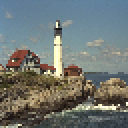

In [2]:
img = testimage("lighthouse")
img = imresize(img, (64, 64))

In [3]:
img_array = channelview(img);
img_array = permutedims(img_array, (2,3,1));
img_array = @. img_array * 2 - 1;

In [4]:
# schedule = LinearSchedule(0.0,4.0,0)
schedule = CosineSchedule()
diffusion = CriticallyDampedDiffusion(schedule; dim=3)

CriticallyDampedDiffusion{Nothing}(CosineSchedule(0.0, 1.0, 1.0, 1.0e-9), nothing, 4.0, 3, 0.04)

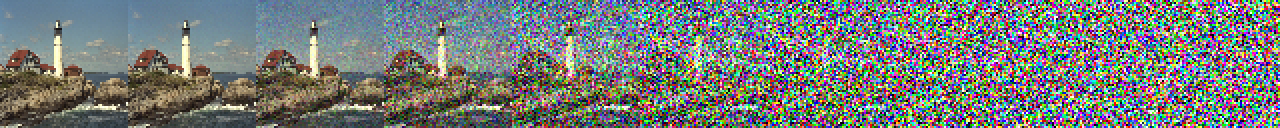

In [5]:
gamma = diffusion.gamma
mass = (1 / diffusion.m_inv)
img_with_v = cat(img_array, randn!(similar(img_array)) .* mass .* gamma, dims=3)
out = plot_diffusion_forward_sde_transition(diffusion, img_with_v, dt=1e-3)
imresize(out, ratio=2, method=Constant())

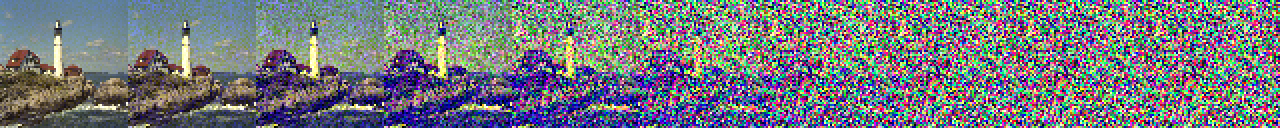

In [6]:
img_out = plot_diffusion_marginal(diffusion, img_with_v)
imresize(img_out, ratio=2, method=Constant())